# 0.0 Regressao Linear

## 0.1 Imports

In [ ]:
import pandas                             as pd
import numpy                              as np

from sklearn               import metrics as mt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LinearRegression

## 0.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation(1)/X_training (1).csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation(1)/X_test (1).csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation(1)/X_validation (1).csv'
df_X_validation = pd.read_csv(path_X_validation)

# Y training / test / validation
path_y_training = './training_test_validation(1)/y_training (1).csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation(1)/y_test (1).csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation(1)/y_val.csv'
df_y_validation = pd.read_csv(path_y_validation)



In [ ]:
df_X_training.head(5)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.092100,0.720,0.802,0.000000,0.090909,0.694,0.431778,1,0.0582,0.103876,0.8,0.723
1,-0.240409,0.737000,0.483,0.412,0.000000,0.636364,0.116,-0.262732,1,0.0402,1.711532,0.6,0.247
2,-0.125770,0.274000,0.671,0.565,0.000065,1.000000,0.370,0.013612,0,0.1600,1.009176,0.8,0.561
3,-0.580967,0.002340,0.704,0.529,0.874000,1.000000,0.370,-0.266382,0,0.0416,0.666173,0.8,0.507
4,-0.688566,0.000414,0.354,0.910,0.205000,0.090909,0.456,0.422914,1,0.0430,1.182630,0.8,0.362


In [ ]:
df_y_training.head(5)

,song_popularity
0,79.0
1,86.0
2,63.0
3,25.0
4,35.0


## 0.3 Features

In [ ]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

label = ['song_popularity']

X_train = df_X_training.loc[:, features]
y_train = df_y_training.loc[:, label]
X_test = df_X_test.loc[:, features]
y_test = df_y_test.loc[:, label]
X_validation = df_X_validation.loc[:, features]
y_validation = df_y_validation.loc[:, label]

### 0.3.1 Pre-processamento Normalizacao

In [ ]:
scaler = StandardScaler()

# Ajustar o escalador apenas no conjunto de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar a transformação ao conjunto de teste e validação
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

## 0.4 Training

In [ ]:
# Model definition
lr_model = LinearRegression(fit_intercept=True)

# Model Fit (ajuste, treinamento)
lr_model.fit(X_train_scaled, y_train)

# Previsao
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)
y_pred_validation = lr_model.predict(X_validation_scaled)

## 0.5 Performance

### 0.5.1 Perfomance sobre dados de Treino

In [ ]:
print("Métricas no Conjunto de Treinamento:")
print('R2:', mt.r2_score(y_train, y_pred_train))
print('MSE:', np.round(mt.mean_squared_error(y_train, y_pred_train), 2))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_train, y_pred_train)))
print('MAE:', np.round(mt.mean_absolute_error(y_train, y_pred_train), 2))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_train, y_pred_train), 2))

Métricas no Conjunto de Treinamento:
R2: 0.04605830473391903
MSE: 456.0
RMSE: 21.35406546364478
MAE: 17.0
MAPE: 8.65


### 0.5.2 Perfomance sobre dados de Validacao

In [ ]:
print("\nMétricas no Conjunto de Validação:")
print('R2:', mt.r2_score(y_validation, y_pred_validation))
print('MSE:', np.round(mt.mean_squared_error(y_validation, y_pred_validation), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_validation, y_pred_validation)))
print('MAE:', np.round(mt.mean_absolute_error(y_validation, y_pred_validation), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_validation, y_pred_validation), 3))


Métricas no Conjunto de Validação:
R2: 0.03992483038154071
MSE: 458.447
RMSE: 21.41137645841414
MAE: 17.04
MAPE: 8.683


### 0.5.3 Perfomance sobre dados de Teste

In [ ]:
print("\nMétricas no Conjunto de Teste:")
print('R2:', mt.r2_score(y_test, y_pred_test))
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred_test), 2))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_test, y_pred_test)))
print('MAE:', np.round(mt.mean_absolute_error(y_test, y_pred_test), 2))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_test, y_pred_test), 2))


Métricas no Conjunto de Teste:
R2: 0.052317119521687494
MSE: 461.43
RMSE: 21.480868682071254
MAE: 17.13
MAPE: 8.52


# 1.0 Decision Tree - Regressor


## 1.1 Imports

In [ ]:
import numpy                                      as np
import pandas                                     as pd

from sklearn               import tree            as tr
from sklearn               import metrics         as mt

from sklearn.preprocessing import StandardScaler

from matplotlib            import pyplot          as plt

## 1.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation(1)/X_training (1).csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation(1)/X_test (1).csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation(1)/X_validation (1).csv'
df_X_validation = pd.read_csv(path_X_validation)

# Y training / test / validation
path_y_training = './training_test_validation(1)/y_training (1).csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation(1)/y_test (1).csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation(1)/y_val.csv'
df_y_validation = pd.read_csv(path_y_validation)



In [ ]:
df_X_training.head(5)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.092100,0.720,0.802,0.000000,0.090909,0.694,0.431778,1,0.0582,0.103876,0.8,0.723
1,-0.240409,0.737000,0.483,0.412,0.000000,0.636364,0.116,-0.262732,1,0.0402,1.711532,0.6,0.247
2,-0.125770,0.274000,0.671,0.565,0.000065,1.000000,0.370,0.013612,0,0.1600,1.009176,0.8,0.561
3,-0.580967,0.002340,0.704,0.529,0.874000,1.000000,0.370,-0.266382,0,0.0416,0.666173,0.8,0.507
4,-0.688566,0.000414,0.354,0.910,0.205000,0.090909,0.456,0.422914,1,0.0430,1.182630,0.8,0.362


In [ ]:
df_y_training.head(5)

,song_popularity
0,79.0
1,86.0
2,63.0
3,25.0
4,35.0


## 1.3 Features

In [ ]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

label = ['song_popularity']

X_train = df_X_training.loc[:, features]
y_train = df_y_training.loc[:, label]
X_test = df_X_test.loc[:, features]
y_test = df_y_test.loc[:, label]
X_validation = df_X_validation.loc[:, features]
y_validation = df_y_validation.loc[:, label]

### 1.3.1 Pre-processamento Normalizacao

In [ ]:
scaler = StandardScaler()

# Ajustar o escalador apenas no conjunto de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar a transformação ao conjunto de teste e validação
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

## 1.4 Training

### 1.4.1 Encontrar o melhor valor para max_depth

In [ ]:
max_depth_values = np.arange(2, 30, 1)
train_results = []
test_results = []
validation_results = []

for i in max_depth_values:
    model_train = tr.DecisionTreeRegressor(max_depth=i)
    
    # Treinamento
    model_train.fit(X_train_scaled, y_train)

    # Performance
    y_pred_train = model_train.predict(X_train_scaled)

    r2 = mt.r2_score(y_train, y_pred_train)
    train_results.append(r2)

    # Teste
    model_test = tr.DecisionTreeRegressor(max_depth=i)
    model_test.fit(X_test_scaled, y_test)
    y_pred_test = model_test.predict(X_test_scaled)

    r2 = mt.r2_score(y_test, y_pred_test)
    test_results.append(r2)

    # Validação
    model_validation = tr.DecisionTreeRegressor(max_depth=i)
    model_validation.fit(X_validation_scaled, y_validation)
    y_pred_validation = model_validation.predict(X_validation_scaled)

    r2 = mt.r2_score(y_validation, y_pred_validation)
    validation_results.append(r2)

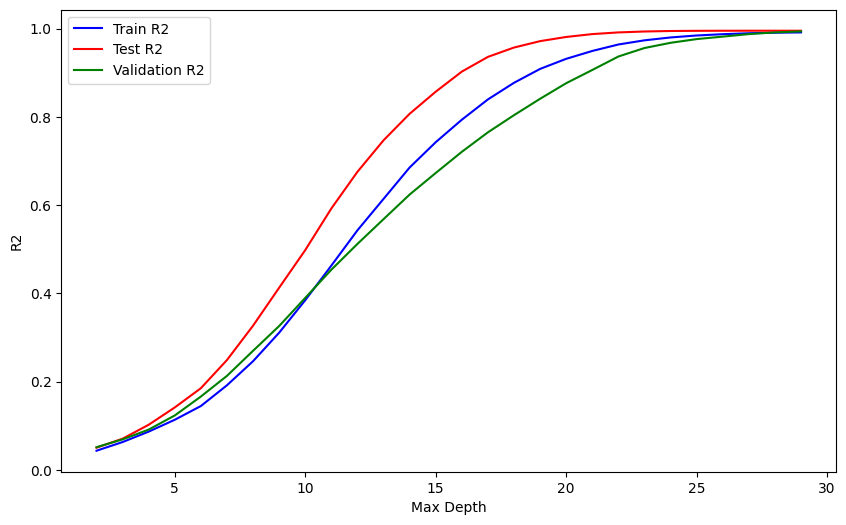

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_results, 'b', label='Train R2')
plt.plot(max_depth_values, test_results, 'r', label='Test R2')
plt.plot(max_depth_values, validation_results, 'g', label='Validation R2')
plt.ylabel('R2')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [ ]:
best_max_depth = max_depth_values[np.argmax(validation_results)]
best_max_depth

29

## 1.5 Performance

### 1.5.1 Perfomance sobre dados de Treino

In [ ]:
# Escolher o melhor modelo
model = tr.DecisionTreeRegressor(max_depth=best_max_depth)
model.fit(X_train_scaled, y_train)

# Previsao
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
y_pred_validation = model.predict(X_validation_scaled)

In [ ]:
print("Métricas no Conjunto de Treinamento:")
print('R2:', mt.r2_score(y_train, y_pred_train))
print('MSE:', np.round(mt.mean_squared_error(y_train, y_pred_train), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_train, y_pred_train)))
print('MAE:', np.round(mt.mean_absolute_error(y_train, y_pred_train), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_train, y_pred_train), 3))

Métricas no Conjunto de Treinamento:
R2: 0.9915340993626588
MSE: 4.047
RMSE: 2.0116676753853415
MAE: 0.239
MAPE: 0.083


### 1.5.2 Perfomance sobre dados de Validacao

In [ ]:
print("\nMétricas no Conjunto de Validação:")
print('R2:', mt.r2_score(y_validation, y_pred_validation))
print('MSE:', np.round(mt.mean_squared_error(y_validation, y_pred_validation), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_validation, y_pred_validation)))
print('MAE:', np.round(mt.mean_absolute_error(y_validation, y_pred_validation), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_validation, y_pred_validation), 3))


Métricas no Conjunto de Validação:
R2: -0.30362660731890423
MSE: 622.497
RMSE: 24.949886625999877
MAE: 17.144
MAPE: 7.105


### 1.5.3 Perfomance sobre dados de Teste

In [ ]:
print("\nMétricas no Conjunto de Teste:")
print('R2:', mt.r2_score(y_test, y_pred_test))
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred_test), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_test, y_pred_test)))
print('MAE:', np.round(mt.mean_absolute_error(y_test, y_pred_test), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_test, y_pred_test), 3))


Métricas no Conjunto de Teste:
R2: -0.2651010852694988
MSE: 615.979
RMSE: 24.818923284734776
MAE: 17.237
MAPE: 6.54


# 2.0 Random Forest - Regressor

### (nao executar - paramgrid usando todos os nucleos)
### Melhores parâmetros encontrados: {'max_depth': None, 'n_estimators': 150}
### Melhor RMSE: 18.00

## 2.1 Imports

In [ ]:
import pandas                                          as pd
import numpy                                           as np

from sklearn                 import ensemble           as en
from sklearn                 import metrics            as mt
from sklearn.model_selection import GridSearchCV

## 2.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation(1)/X_training (1).csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation(1)/X_test (1).csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation(1)/X_validation (1).csv'
df_X_validation = pd.read_csv(path_X_validation)

# Y training / test / validation
path_y_training = './training_test_validation(1)/y_training (1).csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation(1)/y_test (1).csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation(1)/y_val.csv'
df_y_validation = pd.read_csv(path_y_validation)

In [ ]:
df_X_training.head(5)

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.092100,0.720,0.802,0.000000,0.090909,0.694,0.431778,1,0.0582,0.103876,0.8,0.723
1,-0.240409,0.737000,0.483,0.412,0.000000,0.636364,0.116,-0.262732,1,0.0402,1.711532,0.6,0.247
2,-0.125770,0.274000,0.671,0.565,0.000065,1.000000,0.370,0.013612,0,0.1600,1.009176,0.8,0.561
3,-0.580967,0.002340,0.704,0.529,0.874000,1.000000,0.370,-0.266382,0,0.0416,0.666173,0.8,0.507
4,-0.688566,0.000414,0.354,0.910,0.205000,0.090909,0.456,0.422914,1,0.0430,1.182630,0.8,0.362


In [ ]:
df_y_training.head(5)

,song_popularity
0,79.0
1,86.0
2,63.0
3,25.0
4,35.0


## 2.3 Features

In [ ]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

label = ['song_popularity']

X_train = df_X_training.loc[:, features]
y_train = df_y_training.values.ravel()
X_test = df_X_test.loc[:, features]
y_test = df_y_test.values.ravel()
X_validation = df_X_validation.loc[:, features]
y_validation = df_y_validation.values.ravel()

## 2.4 Training

### 2.4.1 Encontrar o melhor valor para n_estimators e max_depth

In [ ]:
# Parametros de busca
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima da árvore
}

# Configuração do modelo e da busca em grade com validação cruzada
model = en.RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Usa todos os núcleos
)

# Execução da busca e obtenção do melhor modelo
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)  # Converte para RMSE (raiz do MSE)
print(f"Melhores parâmetros encontrados: {best_params}")
print(f"Melhor RMSE: {best_score:.2f}")

### 2.4.2 Treinamento usando os melhores valores de n_estimators e max_depth

In [ ]:
# Model definition
best_model = en.RandomForestRegressor(**best_params, random_state=0)

# Model Fit (ajuste, treinamento)
best_model.fit(X_train, y_train)

# Previsao
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_validation = best_model.predict(X_validation)

## 2.5 Performance

### 2.5.1 Perfomance sobre dados de Treino

In [ ]:
print("Métricas no Conjunto de Treinamento:")
print('R2:', mt.r2_score(y_train, y_pred_train))
print('MSE:', np.round(mt.mean_squared_error(y_train, y_pred_train), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_train, y_pred_train)))
print('MAE:', np.round(mt.mean_absolute_error(y_train, y_pred_train), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_train, y_pred_train), 3))

Métricas no Conjunto de Treinamento:
R2: 0.9042365881483294
MSE: 45.776
RMSE: 6.7658047305267885
MAE: 4.833
MAPE: 2.601


### 2.5.2 Perfomance sobre dados de Validacao

In [ ]:
print("\nMétricas no Conjunto de Validação:")
print('R2:', mt.r2_score(y_validation, y_pred_validation))
print('MSE:', np.round(mt.mean_squared_error(y_validation, y_pred_validation), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_validation, y_pred_validation)))
print('MAE:', np.round(mt.mean_absolute_error(y_validation, y_pred_validation), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_validation, y_pred_validation), 3))


Métricas no Conjunto de Validação:
R2: 0.3369674034297767
MSE: 316.606
RMSE: 17.793419119662143
MAE: 12.978
MAPE: 7.058


### 2.5.3 Perfomance sobre dados de Teste

In [ ]:
print("\nMétricas no Conjunto de Teste:")
print('R2:', mt.r2_score(y_test, y_pred_test))
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred_test), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_test, y_pred_test)))
print('MAE:', np.round(mt.mean_absolute_error(y_test, y_pred_test), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_test, y_pred_test), 3))


Métricas no Conjunto de Teste:
R2: 0.35358530928608634
MSE: 314.74
RMSE: 17.740911581324205
MAE: 13.032
MAPE: 6.529


# 3.0 Regressao Polinomial

## 3.1 Imports

In [ ]:
import numpy                                        as np
import pandas                                       as pd

from sklearn                 import metrics         as mt
from sklearn                 import preprocessing   as pp
from sklearn                 import linear_model    as lm
from sklearn.preprocessing   import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score

from matplotlib              import pyplot          as plt

## 3.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation(1)/X_training (1).csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation(1)/X_test (1).csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation(1)/X_validation (1).csv'
df_X_validation = pd.read_csv(path_X_validation)

# Y training / test / validation
path_y_training = './training_test_validation(1)/y_training (1).csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation(1)/y_test (1).csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation(1)/y_val.csv'
df_y_validation = pd.read_csv(path_y_validation)



In [ ]:
df_X_training.head(5)

In [ ]:
df_y_training.head(5)

## 3.3 Features

In [ ]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

label = ['song_popularity']

X_train = df_X_training.loc[:, features]
y_train = df_y_training.loc[:, label]
X_test = df_X_test.loc[:, features]
y_test = df_y_test.loc[:, label]
X_validation = df_X_validation.loc[:, features]
y_validation = df_y_validation.loc[:, label]

### 3.3.1 Pre-processamento Normalizacao

In [ ]:
scaler = StandardScaler()

# Ajustar o escalador apenas no conjunto de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar a transformação ao conjunto de teste e validação
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

## 3.4 Training

### 3.4.1 Encontrar o melhor valor para degrees

In [ ]:
# Faixa de graus a serem testados
degrees = range(1, 5)

train_rmse = []
cv_rmse = []

for i in degrees:
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    
    # Modelo de regressão
    model = lm.LinearRegression()
    
    # Validação cruzada
    scores = cross_val_score(
        model, X_train_poly, y_train, cv=5, scoring="neg_mean_squared_error"
    )
    
    # Ajuste no conjunto de treinamento para medir RMSE no treino
    model.fit(X_train_poly, y_train)
    train_pred = model.predict(X_train_poly)
    train_rmse.append(np.sqrt(mt.mean_squared_error(y_train, train_pred)))
    
    # RMSE médio no conjunto de validação
    mean_cv_rmse = np.sqrt(-np.mean(scores))
    cv_rmse.append(mean_cv_rmse)

# Encontrar o melhor grau
best_degree = degrees[np.argmin(cv_rmse)]

# Exibir resultados
print("Melhor grau encontrado:", best_degree)
print("RMSE no conjunto de validação:", cv_rmse[np.argmin(cv_rmse)])
print("RMSE no conjunto de treino:", train_rmse[np.argmin(cv_rmse)])

### 3.4.2 Visualizar resultados

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse, label="Train RMSE", marker="o")
plt.plot(degrees, cv_rmse, label="Validation RMSE", marker="o")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE vs. Degree")
plt.legend()
plt.show()

## 3.5 Performance

### 3.5.1 Perfomance sobre dados de Treino

In [ ]:
# Criar o polinômio com o melhor grau
poly = pp.PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
X_validation_poly = poly.transform(X_validation_scaled)

# Criar o modelo de regressão linear
model = lm.LinearRegression()

# Treinar o modelo
model.fit(X_train_poly, y_train)

# Fazer previsões
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)
y_pred_validation = model.predict(X_validation_poly)

In [ ]:
print("Métricas no Conjunto de Treinamento:")
print('R2:', mt.r2_score(y_train, y_pred_train))
print('MSE:', np.round(mt.mean_squared_error(y_train, y_pred_train), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_train, y_pred_train)))
print('MAE:', np.round(mt.mean_absolute_error(y_train, y_pred_train), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_train, y_pred_train), 3))

### 3.5.2 Perfomance sobre dados de Validacao

In [ ]:
print("\nMétricas no Conjunto de Validação:")
print('R2:', mt.r2_score(y_validation, y_pred_validation))
print('MSE:', np.round(mt.mean_squared_error(y_validation, y_pred_validation), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_validation, y_pred_validation)))
print('MAE:', np.round(mt.mean_absolute_error(y_validation, y_pred_validation), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_validation, y_pred_validation), 3))

### 3.5.3 Perfomance sobre dados de Teste

In [ ]:
print("\nMétricas no Conjunto de Teste:")
print('R2:', mt.r2_score(y_test, y_pred_test))
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred_test), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_test, y_pred_test)))
print('MAE:', np.round(mt.mean_absolute_error(y_test, y_pred_test), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_test, y_pred_test), 3))

# 4.0 Regressao Linear - LASSO

## 4.1 Imports

In [ ]:
import pandas                                    as pd
import numpy                                     as np

from sklearn                 import metrics      as mt
from sklearn                 import linear_model as lm
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import GridSearchCV

## 4.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation(1)/X_training (1).csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation(1)/X_test (1).csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation(1)/X_validation (1).csv'
df_X_validation = pd.read_csv(path_X_validation)

# Y training / test / validation
path_y_training = './training_test_validation(1)/y_training (1).csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation(1)/y_test (1).csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation(1)/y_val.csv'
df_y_validation = pd.read_csv(path_y_validation)

In [ ]:
df_X_training.head(5)

In [ ]:
df_y_training.head(5)

## 4.3 Features

In [ ]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

label = ['song_popularity']

X_train = df_X_training.loc[:, features]
y_train = df_y_training[label].values.ravel()
X_test = df_X_test.loc[:, features]
y_test = df_y_test[label].values.ravel()
X_validation = df_X_validation.loc[:, features]
y_validation = df_y_validation[label].values.ravel()

### 4.3.1 Pre-processamento Normalizacao

In [ ]:
scaler = StandardScaler()

# Ajustar o escalador apenas no conjunto de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar a transformação ao conjunto de teste e validação
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

## 4.4 Training

### 4.4.1 Encontrar o melhor valor para alpha e max_iter

In [ ]:
# Parametros de busca
param_grid = {
    'alpha': np.logspace(-3, 3, 10),  # Faixa de regularização L1
    'max_iter': [1000, 2000, 5000]                  # Iterações máximas
}

# Configuração do modelo e da busca em grade com validação cruzada
model = lm.Lasso(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Execução da busca e obtenção do melhor modelo
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)  # RMSE a partir de MSE negativo

print(f"Melhores parâmetros encontrados: {best_params}")
print(f"Melhor RMSE (validação cruzada): {best_rmse:.4f}")

### 4.4.2 Treinamento usando os melhores valores

In [ ]:
# Model definition
lr_model = lm.Lasso(alpha=best_params['alpha'], max_iter=best_params['max_iter'], random_state=0)

# Model Fit (ajuste, treinamento)
lr_model.fit(X_train_scaled, y_train)

# Previsao
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)
y_pred_validation = lr_model.predict(X_validation_scaled)
print("Coeficientes do modelo:", lr_model.coef_)

## 4.5 Performance

### 4.5.1 Perfomance sobre dados de Treino

In [ ]:
print("Métricas no Conjunto de Treinamento:")
print('R2:', mt.r2_score(y_train, y_pred_train))
print('MSE:', np.round(mt.mean_squared_error(y_train, y_pred_train), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_train, y_pred_train)))
print('MAE:', np.round(mt.mean_absolute_error(y_train, y_pred_train), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_train, y_pred_train), 3))

### 4.5.2 Perfomance sobre dados de Validacao

In [ ]:
print("\nMétricas no Conjunto de Validação:")
print('R2:', mt.r2_score(y_validation, y_pred_validation))
print('MSE:', np.round(mt.mean_squared_error(y_validation, y_pred_validation), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_validation, y_pred_validation)))
print('MAE:', np.round(mt.mean_absolute_error(y_validation, y_pred_validation), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_validation, y_pred_validation), 3))

### 4.5.3 Perfomance sobre dados de Teste

In [ ]:
print("\nMétricas no Conjunto de Teste:")
print('R2:', mt.r2_score(y_test, y_pred_test))
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred_test), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_test, y_pred_test)))
print('MAE:', np.round(mt.mean_absolute_error(y_test, y_pred_test), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_test, y_pred_test), 3))

# 5.0 Regressao Linear - RIDGE


## 5.1 Imports

In [ ]:
import pandas                                    as pd
import numpy                                     as np

from sklearn                 import metrics      as mt
from sklearn                 import linear_model as lm
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import GridSearchCV

## 5.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation(1)/X_training (1).csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation(1)/X_test (1).csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation(1)/X_validation (1).csv'
df_X_validation = pd.read_csv(path_X_validation)

# Y training / test / validation
path_y_training = './training_test_validation(1)/y_training (1).csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation(1)/y_test (1).csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation(1)/y_val.csv'
df_y_validation = pd.read_csv(path_y_validation)

In [ ]:
df_X_training.head(5)

In [ ]:
df_y_training.head(5)

## 5.3 Features

In [ ]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

label = ['song_popularity']

X_train = df_X_training.loc[:, features]
y_train = df_y_training[label].values.ravel()
X_test = df_X_test.loc[:, features]
y_test = df_y_test[label].values.ravel()
X_validation = df_X_validation.loc[:, features]
y_validation = df_y_validation[label].values.ravel()

### 5.3.1 Pre-processamento Normalizacao

In [ ]:
scaler = StandardScaler()

# Ajustar o escalador apenas no conjunto de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar a transformação ao conjunto de teste e validação
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

## 5.4 Training

### 5.4.1 Encontrar o melhor valor para alpha e max_iter

In [ ]:
param_grid = {
    'alpha': np.logspace(-4, 2, 20),
    'max_iter': [1000, 2000, 5000]
}

# Configuração do modelo e da busca em grade com validação cruzada
model = lm.Ridge(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Execução da busca e obtenção do melhor modelo
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)  # RMSE a partir de MSE negativo

print(f"Melhores parâmetros encontrados: {best_params}")
print(f"Melhor RMSE (validação cruzada): {best_rmse:.4f}")

### 5.4.2 Treinamento usando os melhores valores

In [ ]:
# Model definition
lr_model = lm.Ridge(alpha=best_params['alpha'], max_iter=best_params['max_iter'], random_state=0)

# Model Fit (ajuste, treinamento)
lr_model.fit(X_train_scaled, y_train)

# Previsao
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)
y_pred_validation = lr_model.predict(X_validation_scaled)
print("Coeficientes do modelo:", lr_model.coef_)

## 5.5 Performance

### 5.5.1 Perfomance sobre dados de Treino

In [ ]:
print("Métricas no Conjunto de Treinamento:")
print('R2:', mt.r2_score(y_train, y_pred_train))
print('MSE:', np.round(mt.mean_squared_error(y_train, y_pred_train), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_train, y_pred_train)))
print('MAE:', np.round(mt.mean_absolute_error(y_train, y_pred_train), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_train, y_pred_train), 3))

### 5.5.2 Perfomance sobre dados de Validacao

In [ ]:
print("\nMétricas no Conjunto de Validação:")
print('R2:', mt.r2_score(y_validation, y_pred_validation))
print('MSE:', np.round(mt.mean_squared_error(y_validation, y_pred_validation), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_validation, y_pred_validation)))
print('MAE:', np.round(mt.mean_absolute_error(y_validation, y_pred_validation), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_validation, y_pred_validation), 3))

### 5.5.3 Perfomance sobre dados de Teste

In [ ]:
print("\nMétricas no Conjunto de Teste:")
print('R2:', mt.r2_score(y_test, y_pred_test))
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred_test), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_test, y_pred_test)))
print('MAE:', np.round(mt.mean_absolute_error(y_test, y_pred_test), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_test, y_pred_test), 3))

# 6.0 Regressao Linear - ELASTIC NET

## 6.1 Imports

In [ ]:
import pandas                                    as pd
import numpy                                     as np

from sklearn                 import metrics      as mt
from sklearn                 import linear_model as lm
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import GridSearchCV

## 6.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation(1)/X_training (1).csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation(1)/X_test (1).csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation(1)/X_validation (1).csv'
df_X_validation = pd.read_csv(path_X_validation)

# Y training / test / validation
path_y_training = './training_test_validation(1)/y_training (1).csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation(1)/y_test (1).csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation(1)/y_val.csv'
df_y_validation = pd.read_csv(path_y_validation)

In [ ]:
df_X_training.head(5)

In [ ]:
df_y_training.head(5)

## 6.3 Features

In [ ]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

label = ['song_popularity']

X_train = df_X_training.loc[:, features]
y_train = df_y_training[label].values.ravel()
X_test = df_X_test.loc[:, features]
y_test = df_y_test[label].values.ravel()
X_validation = df_X_validation.loc[:, features]
y_validation = df_y_validation[label].values.ravel()

### 6.3.1 Pre-processamento Normalizacao

In [ ]:
scaler = StandardScaler()

# Ajustar o escalador apenas no conjunto de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar a transformação ao conjunto de teste e validação
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

## 6.4 Training

### 6.4.1 Encontrar o melhor valor para alpha, max_iter e l1_ratio

In [ ]:
# Parametros de busca
param_grid = {
    'alpha': np.logspace(-4, 2, 20),       # Faixa de regularização L1
    'l1_ratio': np.linspace(0.1, 0.9, 9),  # Proporção de regularização L1
    'max_iter': [1000, 2000, 5000]         # Iterações máximas
}

# Configuração do modelo e da busca em grade com validação cruzada
model = lm.ElasticNet(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Execução da busca e obtenção do melhor modelo
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)  # RMSE a partir de MSE negativo

print(f"Melhores parâmetros encontrados: {best_params}")
print(f"Melhor RMSE (validação cruzada): {best_rmse:.4f}")

## 6.5 Performance

### 6.5.1 Perfomance sobre dados de Treino

In [ ]:
# Model definition
lr_model = lm.ElasticNet(alpha=best_params['alpha'], 
                         max_iter=best_params['max_iter'], 
                         l1_ratio=best_params['l1_ratio'])

# Model Fit (ajuste, treinamento)
lr_model.fit(X_train_scaled, y_train)

# Previsao
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)
y_pred_validation = lr_model.predict(X_validation_scaled)

In [ ]:
print("Métricas no Conjunto de Treinamento:")
print('R2:', mt.r2_score(y_train, y_pred_train))
print('MSE:', np.round(mt.mean_squared_error(y_train, y_pred_train), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_train, y_pred_train)))
print('MAE:', np.round(mt.mean_absolute_error(y_train, y_pred_train), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_train, y_pred_train), 3))

### 6.5.2 Perfomance sobre dados de Validacao

In [ ]:
print("\nMétricas no Conjunto de Validação:")
print('R2:', mt.r2_score(y_validation, y_pred_validation))
print('MSE:', np.round(mt.mean_squared_error(y_validation, y_pred_validation), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_validation, y_pred_validation)))
print('MAE:', np.round(mt.mean_absolute_error(y_validation, y_pred_validation), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_validation, y_pred_validation), 3))

### 6.5.3 Perfomance sobre dados de Teste

In [ ]:
print("\nMétricas no Conjunto de Teste:")
print('R2:', mt.r2_score(y_test, y_pred_test))
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred_test), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_test, y_pred_test)))
print('MAE:', np.round(mt.mean_absolute_error(y_test, y_pred_test), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_test, y_pred_test), 3))

# 7.0 Regressao Polinomial - Lasso


### (nao executar - paramgrid usando todos os nucleos)
### Melhores parâmetros encontrados: {'alpha': 0.1, 'max_iter': 5000}

## 7.1 Imports

In [ ]:
import numpy                                        as np
import pandas                                       as pd

from sklearn                 import metrics         as mt
from sklearn                 import preprocessing   as pp
from sklearn                 import linear_model    as lm
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import GridSearchCV

## 7.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation(1)/X_training (1).csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation(1)/X_test (1).csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation(1)/X_validation (1).csv'
df_X_validation = pd.read_csv(path_X_validation)

# Y training / test / validation
path_y_training = './training_test_validation(1)/y_training (1).csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation(1)/y_test (1).csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation(1)/y_val.csv'
df_y_validation = pd.read_csv(path_y_validation)



In [ ]:
df_X_training.head(5)

In [ ]:
df_y_training.head(5)

## 7.3 Features

In [ ]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

label = ['song_popularity']

X_train = df_X_training.loc[:, features]
y_train = df_y_training[label].values.ravel()
X_test = df_X_test.loc[:, features]
y_test = df_y_test[label].values.ravel()
X_validation = df_X_validation.loc[:, features]
y_validation = df_y_validation[label].values.ravel()

### 7.3.1 Pre-processamento Normalizacao

In [ ]:
# Escalonamento dos dados
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

## 7.4 Training

### 7.4.1 Encontrar o melhor valor para degree, alpha e max_iter

In [ ]:
# Criar o polinômio com o melhor grau
poly = pp.PolynomialFeatures(degree=3, include_bias=False)

# Gerar as features polinomiais
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
X_validation_poly = poly.transform(X_validation_scaled)

In [ ]:
param_grid = {
    'alpha': np.logspace(-3, 1, 5),
    'max_iter': [1000, 5000],
}

grid_search = GridSearchCV(
    estimator=lm.Lasso(random_state=0),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error'
)

grid_search.fit(X_train_poly, y_train)
    
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print(f"Melhores parâmetros encontrados: {best_params}")
print(f"Melhor RMSE (validação cruzada): {best_rmse:.3f}")

## 7.5 Performance

### 7.5.1 Perfomance sobre dados de Treino

In [ ]:
# Criar o modelo de regressão lasso
model = lm.Lasso(alpha=0.1, max_iter=5000, random_state=0)

# Treinar o modelo
model.fit(X_train_poly, y_train)

# Fazer previsões
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)
y_pred_validation = model.predict(X_validation_poly)

In [ ]:
print("Métricas no Conjunto de Treinamento:")
print('R2:', mt.r2_score(y_train, y_pred_train))
print('MSE:', np.round(mt.mean_squared_error(y_train, y_pred_train), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_train, y_pred_train)))
print('MAE:', np.round(mt.mean_absolute_error(y_train, y_pred_train), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_train, y_pred_train), 3))

### 7.5.2 Perfomance sobre dados de Validacao

In [ ]:
print("\nMétricas no Conjunto de Validação:")
print('R2:', mt.r2_score(y_validation, y_pred_validation))
print('MSE:', np.round(mt.mean_squared_error(y_validation, y_pred_validation), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_validation, y_pred_validation)))
print('MAE:', np.round(mt.mean_absolute_error(y_validation, y_pred_validation), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_validation, y_pred_validation), 3))

### 7.5.3 Perfomance sobre dados de Teste

In [ ]:
print("\nMétricas no Conjunto de Teste:")
print('R2:', mt.r2_score(y_test, y_pred_test))
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred_test), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_test, y_pred_test)))
print('MAE:', np.round(mt.mean_absolute_error(y_test, y_pred_test), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_test, y_pred_test), 3))

# 8.0 Regressao Polinomial - Ridge

## 8.1 Imports

In [ ]:
import numpy                                        as np
import pandas                                       as pd

from sklearn                 import metrics         as mt
from sklearn                 import preprocessing   as pp
from sklearn                 import linear_model    as lm
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import GridSearchCV

## 8.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation(1)/X_training (1).csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation(1)/X_test (1).csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation(1)/X_validation (1).csv'
df_X_validation = pd.read_csv(path_X_validation)

# Y training / test / validation
path_y_training = './training_test_validation(1)/y_training (1).csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation(1)/y_test (1).csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation(1)/y_val.csv'
df_y_validation = pd.read_csv(path_y_validation)



In [ ]:
df_X_training.head(5)

In [ ]:
df_y_training.head(5)

## 8.3 Features

In [ ]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

label = ['song_popularity']

X_train = df_X_training.loc[:, features]
y_train = df_y_training[label].values.ravel()
X_test = df_X_test.loc[:, features]
y_test = df_y_test[label].values.ravel()
X_validation = df_X_validation.loc[:, features]
y_validation = df_y_validation[label].values.ravel()

### 8.3.1 Pre-processamento Normalizacao

In [ ]:
# Escalonamento dos dados
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

## 8.4 Training

### 8.4.1 Encontrar o melhor valor para degree, alpha e max_iter

In [ ]:
# Criar o polinômio com o melhor grau
poly = pp.PolynomialFeatures(degree=2, include_bias=False)

# Gerar as features polinomiais
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
X_validation_poly = poly.transform(X_validation_scaled)

In [ ]:
param_grid = {
    'alpha': np.logspace(-3, 1, 5),
    'max_iter': [1000, 5000],
}

grid_search = GridSearchCV(
    estimator=lm.Ridge(random_state=0),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error'
)

grid_search.fit(X_train_poly, y_train)
    
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print(f"Melhores parâmetros encontrados: {best_params}")
print(f"Melhor RMSE (validação cruzada): {best_rmse:.3f}")

## 8.5 Performance

### 8.5.1 Perfomance sobre dados de Treino

In [ ]:
# Criar o modelo de regressão lasso
model = lm.Ridge(
    alpha=best_params['alpha'],
    max_iter=best_params['max_iter'],
    random_state=0
)

# Treinar o modelo
model.fit(X_train_poly, y_train)

# Fazer previsões
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)
y_pred_validation = model.predict(X_validation_poly)

In [ ]:
print("Métricas no Conjunto de Treinamento:")
print('R2:', mt.r2_score(y_train, y_pred_train))
print('MSE:', np.round(mt.mean_squared_error(y_train, y_pred_train), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_train, y_pred_train)))
print('MAE:', np.round(mt.mean_absolute_error(y_train, y_pred_train), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_train, y_pred_train), 3))

### 8.5.2 Perfomance sobre dados de Validacao

In [ ]:
print("\nMétricas no Conjunto de Validação:")
print('R2:', mt.r2_score(y_validation, y_pred_validation))
print('MSE:', np.round(mt.mean_squared_error(y_validation, y_pred_validation), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_validation, y_pred_validation)))
print('MAE:', np.round(mt.mean_absolute_error(y_validation, y_pred_validation), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_validation, y_pred_validation), 3))

### 8.5.3 Perfomance sobre dados de Teste

In [ ]:
print("\nMétricas no Conjunto de Teste:")
print('R2:', mt.r2_score(y_test, y_pred_test))
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred_test), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_test, y_pred_test)))
print('MAE:', np.round(mt.mean_absolute_error(y_test, y_pred_test), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_test, y_pred_test), 3))

# 9.0 Regressao Polinomial - ELASTIC NET


## 9.1 Imports

In [ ]:
import pandas                                       as pd
import numpy                                        as np

from sklearn                 import metrics         as mt
from sklearn                 import linear_model    as lm
from sklearn                 import preprocessing   as pp
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import GridSearchCV

## 9.2 Load Dataset

In [ ]:
# X training / test / validation
path_X_training = './training_test_validation(1)/X_training (1).csv'
df_X_training = pd.read_csv(path_X_training)
path_X_test = './training_test_validation(1)/X_test (1).csv'
df_X_test = pd.read_csv(path_X_test)
path_X_validation = './training_test_validation(1)/X_validation (1).csv'
df_X_validation = pd.read_csv(path_X_validation)

# Y training / test / validation
path_y_training = './training_test_validation(1)/y_training (1).csv'
df_y_training = pd.read_csv(path_y_training)
path_y_test = './training_test_validation(1)/y_test (1).csv'
df_y_test = pd.read_csv(path_y_test)
path_y_validation = './training_test_validation(1)/y_val.csv'
df_y_validation = pd.read_csv(path_y_validation)

In [ ]:
df_X_training.head(5)

In [ ]:
df_y_training.head(5)

## 9.3 Features

In [ ]:
features = ['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence']

label = ['song_popularity']

X_train = df_X_training.loc[:, features]
y_train = df_y_training[label].values.ravel()
X_test = df_X_test.loc[:, features]
y_test = df_y_test[label].values.ravel()
X_validation = df_X_validation.loc[:, features]
y_validation = df_y_validation[label].values.ravel()

### 9.3.1 Pre-processamento Normalizacao

In [ ]:
# Escalonamento dos dados
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

## 9.4 Training

### 9.4.1 Encontrar o melhor valor para degree, alpha, max_iter e l1_ratio

In [ ]:
# Criar o polinômio com o melhor grau
poly = pp.PolynomialFeatures(degree=2, include_bias=False)

# Gerar as features polinomiais
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
X_validation_poly = poly.transform(X_validation_scaled)

In [ ]:
for degree in [1, 2, 3]:
    print(f"\nTestando com polinômio de grau {degree}...")
    poly = pp.PolynomialFeatures(degree=degree, include_bias=False)

    # Configuração da busca de hiperparâmetros para ElasticNet
    param_grid = {
        'alpha': [0.01, 0.1, 1, 10],  # Reduzido para valores chave
        'l1_ratio': [0.2, 0.5, 0.8], # Menos combinações
        'max_iter': [1000]           # Apenas um valor para economizar tempo
    }

    grid_search = GridSearchCV(
        estimator= lm.ElasticNet(random_state=0),
        param_grid=param_grid,
        cv=3,  # Reduzido para 3 folds para acelerar
        scoring='neg_mean_absolute_error',
        n_jobs=-1  # Paralelizar busca
    )
    
    # Executar busca de hiperparâmetros
    grid_search.fit(X_train_poly, y_train)
    best_params = grid_search.best_params_
    best_rmse = np.sqrt(-grid_search.best_score_)  # RMSE a partir de MSE negativo

print(f"Melhores parâmetros encontrados: {best_params}")
print(f"Melhor RMSE (validação cruzada): {best_rmse:.4f}")
# Melhor modelo encontrado:
# degree         2
# best_params    {'alpha': 9.1, 'l1_ratio': 9.8, 'max_iter': 1000}

## 9.5 Performance

### 9.5.1 Perfomance sobre dados de Treino

In [ ]:
# Model definition
lr_model = lm.ElasticNet(alpha=0.1, 
                         max_iter=1000, 
                         l1_ratio=0.8,
                         random_state=0)

# Model Fit (ajuste, treinamento)
lr_model.fit(X_train_poly, y_train)

# Previsao
y_pred_train = lr_model.predict(X_train_poly)
y_pred_test = lr_model.predict(X_test_poly)
y_pred_validation = lr_model.predict(X_validation_poly)

In [ ]:
print("Métricas no Conjunto de Treinamento:")
print('R2:', mt.r2_score(y_train, y_pred_train))
print('MSE:', np.round(mt.mean_squared_error(y_train, y_pred_train), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_train, y_pred_train)))
print('MAE:', np.round(mt.mean_absolute_error(y_train, y_pred_train), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_train, y_pred_train), 3))

### 9.5.2 Perfomance sobre dados de Validacao

In [ ]:
print("\nMétricas no Conjunto de Validação:")
print('R2:', mt.r2_score(y_validation, y_pred_validation))
print('MSE:', np.round(mt.mean_squared_error(y_validation, y_pred_validation), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_validation, y_pred_validation)))
print('MAE:', np.round(mt.mean_absolute_error(y_validation, y_pred_validation), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_validation, y_pred_validation), 3))

### 9.5.3 Perfomance sobre dados de Teste

In [ ]:
print("\nMétricas no Conjunto de Teste:")
print('R2:', mt.r2_score(y_test, y_pred_test))
print('MSE:', np.round(mt.mean_squared_error(y_test, y_pred_test), 3))
print('RMSE:', np.sqrt(mt.mean_squared_error(y_test, y_pred_test)))
print('MAE:', np.round(mt.mean_absolute_error(y_test, y_pred_test), 3))
print('MAPE:', np.round(mt.mean_absolute_percentage_error(y_test, y_pred_test), 3))